In [2]:
'''
1. 公元前 2150 年以来的重大地震
        重大地震数据库包含公元前 2150 年至今破坏性地震的相关信息。
        以.tsv 格式下载完整的重大地震数据文件 earthquakes.tsv。
        将该文件（例如：earthquakes.tsv）读取为一个对象，并命名为 Sig_Eqs。'''

import pandas as pd
Sig_Eqs = pd.read_csv('earthquakes.tsv', sep='\t')  #tsv，制表符分隔'\t'

In [7]:
#Sig_Eqs.columns
# Country（国家）、Deaths（死亡人数）、Year（年份）、Mag（震级）、Mo（月份）、Dy（日期）。

In [8]:
#Sig_Eqs

In [6]:
'''1.1 [5 分]计算公元前 2150 年以来每个国家因地震造成的死亡总数，然后输出死亡人数排名前十的国家及其对应的死亡总数。'''
#print(f"Year列范围：{Sig_Eqs['Year'].min()} 至 {Sig_Eqs['Year'].max()}")
country_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()
#print(country_deaths)
top10_deaths = country_deaths.sort_values(by='Deaths', ascending=False).head(10)
print(top10_deaths)

        Country     Deaths
28        CHINA  2139210.0
142      TURKEY  1199742.0
65         IRAN  1014453.0
69        ITALY   498219.0
132       SYRIA   419226.0
58        HAITI   323484.0
10   AZERBAIJAN   319251.0
71        JAPAN   242445.0
6       ARMENIA   191890.0
103    PAKISTAN   145083.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

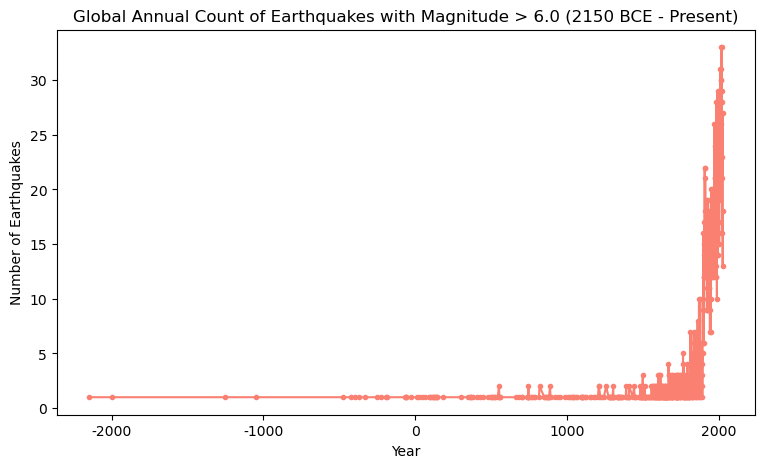

In [152]:
'''1.2 [10 分]计算全球每年震级大于 6.0（以 “Mag” 列为震级数据）的地震总数，绘制时间序列图。你是否观察到任何趋势？请解释原因。'''
Sig_Eqs_6 = Sig_Eqs[(Sig_Eqs['Mag'] > 6.0) & (Sig_Eqs['Mag'].notna())]
year_eqs = Sig_Eqs_6.groupby('Year').size().reset_index(name='Year_Eqs')

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(year_eqs['Year'], year_eqs['Year_Eqs'], marker='.', linestyle='-', color='#FA8072')
plt.title('Global Annual Count of Earthquakes with Magnitude > 6.0 (2150 BCE - Present)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


'''
通过对全球每年震级大于 6.0 地震数据的分析，观察到阶段性阶梯式增长趋势，该趋势反映人类监测与记录能力的进步：
公元前 2150 年 - 公元 1000 年的古代阶段，年均地震记录仅 1.05 次，且年份记录稀疏（仅 84 个年份有数据），因无专业监测设备，大量偏远地区地震被遗漏；
公元 1001 年 - 1900 年的近代阶段，年均记录提升至 2.19 次，记录年份增至 343 个，但仍受限于信息传播与记录技术，数据连续性有限；
1900 年至今的现代阶段，年均记录激增至 17.90 次，125 个年份均有完整数据，尤其 1960 年后全球地震监测网络建立，可实时捕捉全球强震，数据进入 15-30 次 / 年的稳定区间，
且 1900 年后存在微弱逐年增长（年均增 0.0999 次，统计显著），这源于监测精度提升与历史数据回溯补充。
所以，“地震数量增长” 是人类对地震认知能力提升的结果，地球板块运动活跃度在数千年尺度内相对稳定，1960 年后数据才具备反映地震活动周期性波动的参考价值。
'''
year_eqs.to_csv('global_annual_earthquakes_gt6.csv', index=False)

In [37]:
'''1.3 [10 分]编写一个函数 CountEq_LargestEq，返回两个结果：
        （1）某一给定国家自公元前 2150 年以来的地震总数；
        （2）该国发生过的震级最大地震的日期。
        将该函数应用于文件中的所有国家，按地震总数降序排列并报告结果。'''

import pandas as pd

def CountEq_LargestEq(country1):
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == country1]
    country1_eqs = len(country_eqs)
    
    country_eqs = country_eqs.sort_values(by='Mag', ascending=False)
    x = country_eqs.iloc[0]
    year = int(x['Year']) if pd.notna(x['Year']) else 0
    month = int(x['Mo']) if pd.notna(x['Mo']) else 0
    day = int(x['Dy']) if pd.notna(x['Dy']) else 0
    country1_eqs_max = f"{year:04d}-{month:02d}-{day:02d}"
    return (country1_eqs, country1_eqs_max)


print(Sig_Eqs['Country'][pd.notna(Sig_Eqs['Country'])].unique())
print(" ")
cc = 'IRELAND'
print(f"{cc} 的地震总数是 {CountEq_LargestEq(cc)[0]}，最大震级地震日期是 {CountEq_LargestEq(cc)[1]} 。")


unique_countries = Sig_Eqs['Country'][pd.notna(Sig_Eqs['Country'])].unique()
country_results = []
for country in unique_countries:
    total, max_date = CountEq_LargestEq(country)
    country_results.append({
        'Country': country,
        'Earthquake_Count': total,
        'Largest_Eq_Date': max_date
    })
results_df = pd.DataFrame(country_results)
results_df = results_df.sort_values(by='Earthquake_Count', ascending=False).reset_index(drop=True)
results_df.to_csv('CountEq_LargestEq.csv', index=False)
results_df

['JORDAN' 'SYRIA' 'TURKMENISTAN' 'GREECE' 'ISRAEL' 'ITALY' 'LEBANON'
 'IRAN' 'INDIA' 'TURKEY' 'KYRGYZSTAN' 'SPAIN' 'EGYPT' 'PORTUGAL' 'CHINA'
 'RUSSIA' 'ALBANIA' 'GEORGIA' 'BULGARIA' 'CYPRUS' 'PAKISTAN' 'SOUTH KOREA'
 'AFGHANISTAN' 'UKRAINE' 'MACEDONIA' 'TUNISIA' 'AZERBAIJAN' 'THAILAND'
 'FRANCE' 'KAZAKHSTAN' 'NORTH KOREA' 'SLOVENIA' 'IRAQ' 'JAPAN' 'LIBYA'
 'UK' 'ARMENIA' 'UZBEKISTAN' 'ICELAND' 'SWITZERLAND' 'YEMEN' 'NEPAL'
 'MOROCCO' 'CROATIA' 'AUSTRIA' 'ALGERIA' 'BOSNIA-HERZEGOVINA' 'SLOVAKIA'
 'SERBIA' 'MYANMAR (BURMA)' 'PERU' 'MEXICO' 'IRELAND' 'OMAN' 'VENEZUELA'
 'USA' 'DOMINICAN REPUBLIC' 'GERMANY' 'ROMANIA' 'CHILE'
 'AZORES (PORTUGAL)' 'HONDURAS' 'URUGUAY' 'ECUADOR' 'MONTENEGRO'
 'GUATEMALA' 'COLOMBIA' 'EL SALVADOR' 'COSTA RICA' 'BOLIVIA' 'PHILIPPINES'
 'PANAMA' 'INDONESIA' 'ETHIOPIA' 'GHANA' 'NICARAGUA' 'TAIWAN' 'CANADA'
 'BRAZIL' 'JAMAICA' 'CUBA' 'ANTIGUA AND BARBUDA' 'ARGENTINA' 'HAITI'
 'MARTINIQUE' 'USA TERRITORY' 'ERITREA' 'ATLANTIC OCEAN' 'BANGLADESH'
 'HUNGARY' 'PAPUA NE

,Country,Earthquake_Count,Largest_Eq_Date
0,CHINA,623,1668-07-25
1,JAPAN,424,2011-03-11
2,INDONESIA,421,2004-12-26
3,IRAN,388,0856-12-22
4,TURKEY,358,1939-12-26
...,...,...,...
153,CENTRAL AFRICAN REPUBLIC,1,1921-09-16
154,GRENADA,1,1822-12-01
155,IRELAND,1,1490-00-00
156,GABON,1,1974-09-23


In [56]:
'''2. 2010-2020 年深圳风速分析
        本习题集将探究深圳过去 10 年的风速变化规律，我们将使用宝安国际机场记录的逐时气象数据。
        该数据集来源于美国国家海洋和大气管理局（NOAA）综合地面数据集。
        请下载文件 2281305.zip（其中 2281305 为站点编号），解压后会得到名为 2281305.csv 的文件，将该 CSV 文件保存到你的工作目录中。
        请查阅综合用户指南的第 8-9 页（位置编号 61-70），了解风速数据的详细格式说明，并在报告中阐述你的数据筛选方法。'''


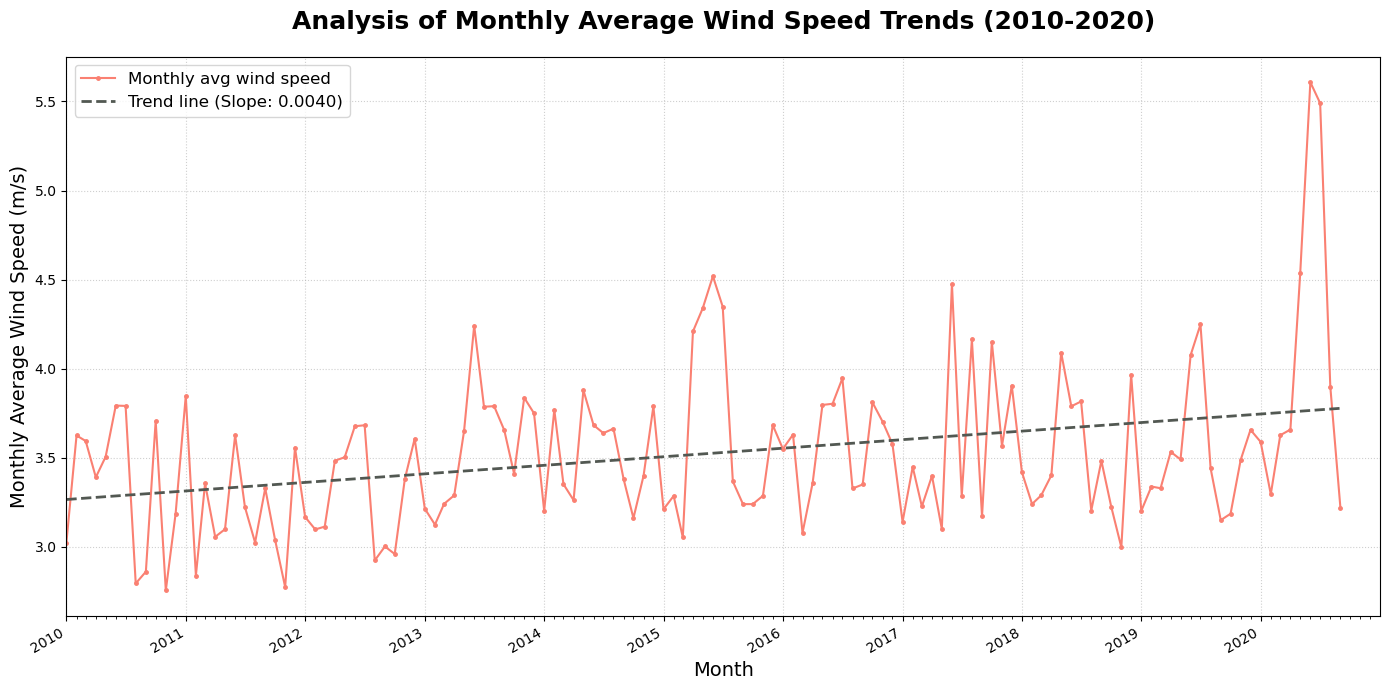

In [97]:
'''[10 分] 绘制月平均风速随观测时间变化的图表。2010-2020 年的月平均风速是否存在变化趋势？'''

'''
数据解析步骤:

提取 WND 列：这是我们的数据源。
解析 WND 字符串：
风向角度：从第 0 个字符开始，取 3 个字符（WND[0:3]）。
方向质量码：第 3 个字符（WND[3]）。
类型码：第 4 个字符（WND[4]）。
风速：从第 5 个字符开始，取 4 个字符（WND[5:9]）。
风速质量码：第 9 个字符（WND[9]）。
数据清洗：
将解析出的字符串转换为数值类型。
根据质量码和缺失值代码（如 999 表示风向缺失，9999 表示风速缺失）过滤掉无效数据。
将风速值除以 10，得到以米 / 秒（m/s）为单位的实际风速。
提取时间信息：从 DATE 列中提取出年份和月份，用于后续的分组计算。
'''

import pandas as pd
SZ_wind = pd.read_csv('2281305.csv', low_memory=False)
#print(SZ_wind.columns)
#print(SZ_wind)

#print(SZ_wind['WND'].head())
wnd_components = SZ_wind['WND'].str.split(',', expand=True)
wnd_components.columns = ['WIND_DIR', 'DIR_QUALITY', 'TYPE_CODE', 'WIND_SPEED', 'SPD_QUALITY']
wnd_components.head()

SZ_wind = pd.concat([SZ_wind, wnd_components], axis=1)
#print(SZ_wind.head())

SZ_wind['WIND_DIR'] = pd.to_numeric(SZ_wind['WIND_DIR'], errors='coerce')
SZ_wind['WIND_SPEED'] = pd.to_numeric(SZ_wind['WIND_SPEED'], errors='coerce')
SZ_wind.head()
#print(len(SZ_wind))

SZ_wind = SZ_wind[
    (SZ_wind['WIND_SPEED'] != 9999) & 
    (SZ_wind['WIND_DIR'] != 999) & 
    (SZ_wind['WIND_DIR'].notna()) & 
    (SZ_wind['WIND_SPEED'].notna())
].copy()
SZ_wind.head()
len(SZ_wind)

SZ_wind.loc[:, 'WIND_SPEED_MPS'] = SZ_wind['WIND_SPEED'] / 10.0  #风速 m/s
SZ_wind.head()

SZ_wind.loc[:, 'YEAR'] = pd.to_datetime(SZ_wind['DATE']).dt.year
SZ_wind.loc[:, 'MONTH'] = pd.to_datetime(SZ_wind['DATE']).dt.month
#print(SZ_wind.head())

# 2010-2020
SZ_wind = SZ_wind[(SZ_wind['YEAR'] >= 2010) & (SZ_wind['YEAR'] <= 2020)]

monthly_avg = SZ_wind.groupby(['YEAR', 'MONTH'])['WIND_SPEED_MPS'].mean().reset_index()
monthly_avg.loc[:, 'DATE'] = pd.to_datetime(
    monthly_avg['YEAR'].astype(str) + '-' + monthly_avg['MONTH'].astype(str) + '-01'
)
monthly_avg = monthly_avg.sort_values('DATE')
monthly_avg
monthly_avg.to_csv('monthly_average_wind_speed_2010_2020.csv', index=False, encoding='utf-8')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator # 新增导入

# 画图
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(monthly_avg['DATE'], monthly_avg['WIND_SPEED_MPS'], marker='.', markersize=5, 
        linestyle='-', color='#FA8072', alpha=1, label='Monthly avg wind speed')
z = np.polyfit(range(len(monthly_avg)), monthly_avg['WIND_SPEED_MPS'], 1)
p = np.poly1d(z)
ax.plot(monthly_avg['DATE'], p(range(len(monthly_avg))), 
        linestyle='--', color='#525852', linewidth=2, 
        label=f'Trend line (Slope: {z[0]:.4f})')
ax.set_title('Analysis of Monthly Average Wind Speed Trends (2010-2020)', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Monthly Average Wind Speed (m/s)', fontsize=14)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2020-12-31'))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.xaxis.set_minor_locator(MonthLocator())
fig.autofmt_xdate()
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

#2010-2020 年的月平均风速存在显著的短期波动（不同季节的风速差异较大），但从长期趋势来看，年平均风速整体呈现上升态势。
#这种 “波动大但整体上升” 的特征，可能源于短期随机因素（如季节性气流、极端天气事件）导致的月度数据起伏。


In [100]:
'''
3. 探索数据集
    浏览 CASEarth（国家地球系统科学数据中心）、美国国家环境信息中心（NCEI）或全球大气气体高级观测实验（AGAGE）的官方网站。
    搜索并下载一个你感兴趣的数据集，也可使用本习题集中你所在小组的自有数据。数据集需为 csv、XLS 或 XLSX 格式，且包含时间信息。
        3.1 [5 分] 读取 csv、XLS 或 XLSX 文件，并清洗存在缺失值或低质量的数据点。
        3.2 [5 分] 绘制某一变量的时间序列图。
        3.3 [5 分] 对该变量进行至少 5 项简单统计检验，并报告分析结果。
'''

In [156]:
'''北极点数据集分析
        3.1 [5 分] 读取 csv、XLS 或 XLSX 文件，并清洗存在缺失值或低质量的数据点。'''
import pandas as pd
NORTH_POLE = pd.read_csv('USC00506581.csv')  
#print(NORTH_POLE)
#print(NORTH_POLE.columns)

#挑出高质量数据列
NORTH_POLE = NORTH_POLE[['DATE', 'DSNW', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']]. \
            rename(columns={'DSNW': 'Snow_Days', 'PRCP': 'Precipitation', 'SNOW': 'Snow_Depth', 'TAVG': 'Average_Temperature',  \
                'TMAX': 'Maximum_Temperature', 'TMIN': 'Minimum_Temperature'})
NORTH_POLE

NORTH_POLE = NORTH_POLE.dropna(axis=0, how='any')
NORTH_POLE.head()
#print(NORTH_POLE)
#NORTH_POLE
#年份 下雪天数，降水量，雪深度，平均气温，最大气温，最小气温

,DATE,Snow_Days,Precipitation,Snow_Depth,Average_Temperature,Maximum_Temperature,Minimum_Temperature
0,1970,27.0,321.2,2475.0,-3.85,2.53,-10.23
2,1972,20.0,241.1,1539.0,-5.25,1.25,-11.75
3,1973,17.0,273.1,862.0,-4.59,1.84,-11.02
4,1974,27.0,247.1,2099.0,-6.13,0.47,-12.73
5,1975,19.0,258.4,1351.0,-6.40,0.29,-13.09


/var/folders/85/4w2zbyv53z5cs_4p1rn0rrlm0000gn/T/ipykernel_90439/888100318.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found

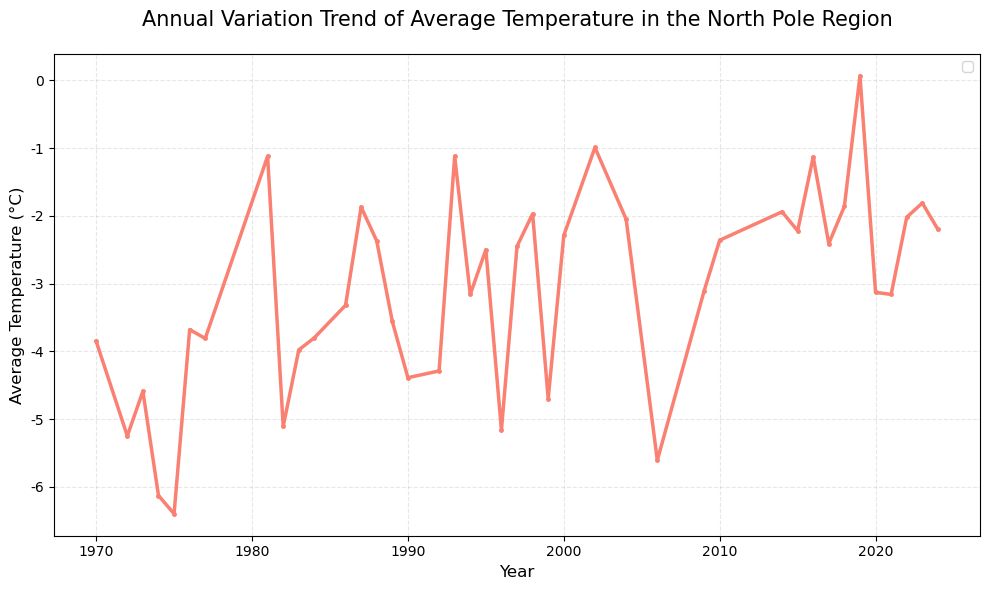

In [128]:
'''北极点数据集分析
        3.2 [5 分] 绘制某一变量的时间序列图。'''
import matplotlib.pyplot as plt
import pandas as pd

NORTH_POLE['YEAR'] = NORTH_POLE['DATE'].astype(int)

plt.figure(figsize=(10, 6))  
plt.plot(NORTH_POLE['YEAR'], NORTH_POLE['Average_Temperature'], 
         color='#FA8072', linewidth=2.5, marker='.', markersize=5)
plt.title('Annual Variation Trend of Average Temperature in the North Pole Region', fontsize=15, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [131]:
'''北极点数据集分析
        3.3 [5 分] 对该变量进行至少 5 项简单统计检验，并报告分析结果。
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.fftpack import fft
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

x = NORTH_POLE['YEAR']
y = NORTH_POLE['Average_Temperature']

In [138]:
# 1. 趋势性检验 (线性回归)

slope, intercept, r_value, p_value, _ = stats.linregress(x, y)

print("1. 趋势性检验")
print(f"斜率: {slope:.4f}, R²: {r_value**2:.4f}, P值: {p_value:.4f}")
print("结论: 温度随时间显著上升")

1. 趋势性检验
斜率: 0.0512, R²: 0.3193, P值: 0.0001
结论: 温度随时间显著上升


In [139]:
# 2. 正态性检验 (Shapiro-Wilk)

stat_shapiro, p_shapiro = stats.shapiro(y)

print("2. 正态性检验")
print(f"统计量: {stat_shapiro:.4f}, P值: {p_shapiro:.4f}")
print("结论: 数据符合正态分布")

2. 正态性检验
统计量: 0.9730, P值: 0.4304
结论: 数据符合正态分布


In [140]:
# 3. 相关性检验 (Pearson/Spearman)

pearson_corr, p_pearson = stats.pearsonr(x, y)
spearman_corr, p_spearman = stats.spearmanr(x, y)

print("3. 相关性检验")
print(f"Pearson相关系数: {pearson_corr:.4f}, P值: {p_pearson:.4f}")
print(f"Spearman相关系数: {spearman_corr:.4f}, P值: {p_spearman:.4f}")
print("结论: 存在显著线性相关")

3. 相关性检验
Pearson相关系数: 0.5650, P值: 0.0001
Spearman相关系数: 0.5695, P值: 0.0001
结论: 存在显著线性相关


In [143]:
# 4. 异常值检验 (IQR方法)

Q1, Q3 = y.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = NORTH_POLE[(y < lower_bound) | (y > upper_bound)]

print("4. 异常值检验")
print(f"异常值数量: {len(outliers)}")
if len(outliers) > 0:
    print("异常值年份及温度:")
    print(outliers[['YEAR', 'Average_Temperature']].to_string(index=False))

4. 异常值检验
异常值数量: 0


In [149]:
# 5. 周期性检验 (自相关 + 功率谱)

x = NORTH_POLE['YEAR']
y = NORTH_POLE['Average_Temperature']

# 自相关分析
acf_vals = acf(y, nlags=10)
max_acf_lag = np.argmax(np.abs(acf_vals[1:])) + 1  # 排除lag=0

# 功率谱分析
n = len(y)
y = y.values  # 关键修改：添加这一行
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0), n//2)
power_spectrum = 2.0/n * np.abs(yf[0:n//2])
peak_freq = xf[np.argmax(power_spectrum[1:]) + 1] if n//2 > 1 else 0
period = 1 / peak_freq if peak_freq != 0 else np.inf

print("5. 周期性检验")
print(f"最强自相关滞后: {max_acf_lag} 年")
print(f"主要周期: {period:.2f} 年")
print("结论: " + (f"可能存在 {period:.2f} 年的周期性波动" if period < np.inf else "无明显周期性"))

5. 周期性检验
最强自相关滞后: 1 年
主要周期: 38.00 年
结论: 可能存在 38.00 年的周期性波动
